# Useful pieces for Tandem simulation
Last modification: 2024.01.17. </br>
Update note: Corrected nucleation size formula

# Initiate

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import interpolate
from cmcrameri import cm
import myplots
import change_params
import setup_shortcut

sc = setup_shortcut.setups()
ch = change_params.variate()
mp = myplots.Figpref()

# prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_various_fractal_profiles/Dc2'
# prefix = 'perturb_stress/reference'
# prefix = 'lithostatic_sn/v2_ab2_Dc2_adjusted'
prefix = 'depth_dep_sn/reference'

y,Hs,a,b,a_b,tau0,sigma0,Dc,others = ch.load_parameter(prefix)

print('prefix =',prefix)
print('len(y):',len(y))
print('len(a_b):',len(a_b))
print('len(tau0):',len(tau0))
print('len(sigma0):',len(sigma0))
print('len(Dc):',len(Dc))
print('others[-1]:',others[-1])

Fractal depth-dependent normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_litho_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02
prefix = depth_dep_sn/reference
len(y): 1000
len(a_b): 2
len(tau0): 1000
len(sigma0): 2
len(Dc): 2
others[-1]: 0.6


# Time conversion

## Seconds to hours, minutes, and seconds

In [3]:
sc.sec2hms(459258)

Input time: 459258.00 s
= 127 h 34 m 18 s


## Seconds to years, years to seconds

In [3]:
# Second to years
sec = 1.77551e+10
print('%d s <=> %2.2f yrs'%(sec,sec/sc.yr2sec))

# # Years to seconds
years = 600
# print('%2.2f yrs <=> %d s'%(years,years*sc.yr2sec))
print('%2.2f yrs <=> %1.6e s'%(years,years*sc.yr2sec))

17755100000 s <=> 563.01 yrs
600.00 yrs <=> 1.892160e+10 s


# Print out receiver location

In [ ]:
d = 0
c = 0
while d <= 40:
    if d < 18:
        dt = 0.5
    elif d < 25:
        dt = 1.5
    else:
        dt = 2
    c += 1
    if d > 12:
        print('{ name = "dp%03d", x = [0.0, %1.1f] },'%(round(d*10),-d))
    d += dt

# Check things

## Initial stress

Fractal depth-dependent normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_litho_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02


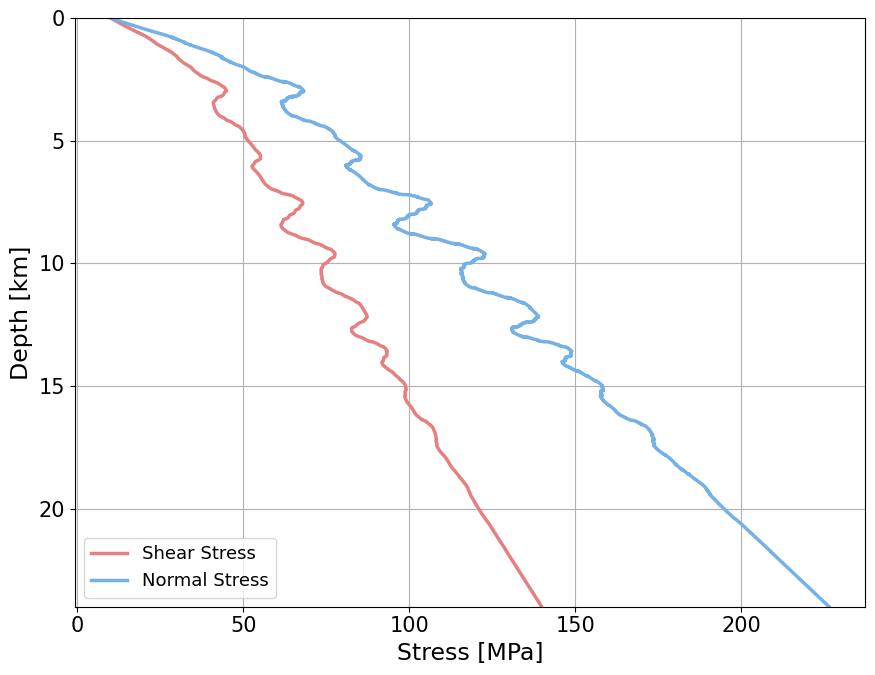

In [3]:
save_on = 1

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(9,7))
y,Hs,a,b,_a_b,tau0,_sigma0,L,others = ch.load_parameter(prefix)
if len(_sigma0) == 2:
    sigma0 = _sigma0[0]
    y_in = _sigma0[1]
    tau0 = ch.same_length(y,tau0,y_in)
else:
    sigma0 = _sigma0
    y_in = y

ax.plot(-tau0,abs(y_in),lw=2.5,color=mp.mypink,label='Shear Stress')
ax.plot(sigma0,abs(y_in),lw=2.5,color=mp.myblue,label='Normal Stress')
ax.set_xlabel('Stress [MPa]',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
if np.max(sigma0) < 100:
    ax.set_xlim(-2,60)
# else:
#     ax.set_xlim(0,400)
ax.set_ylim(0,Hs[0])
ax.invert_yaxis()
plt.grid(True)
ax.legend(fontsize=13,loc='lower left')
plt.tight_layout()
if save_on:
    plt.savefig('plots/%s/stress_profile.png'%(prefix.split('/')[0]))

## a-b profile

In [ ]:
save_on = 1

y,Hs,a0,b0,_a_b = ch.load_parameter(prefix)[0:5]
if len(_a_b) == 2:
    y_in = _a_b[1]
else:
    y_in = y
if len(prefix.split('/')) > 1:
    fname = '%s/%s/ab_profile_%s'%(ch.setup_dir,prefix.split('/')[0],prefix.split('/')[-1])
else:
    fname = '%s/%s/ab_profile'%(ch.setup_dir,prefix)

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(9,7))
ax.plot(a0,abs(y_in),color='0.5',lw=3,label='a',zorder=3)
ax.plot(b0,abs(y_in),color='k',lw=3,label='b',zorder=3)
ax.plot(a0-b0,abs(y_in),color=mp.myburgundy,lw=3,label='a-b',zorder=3)
ax.set_xlabel('Friction Paramters',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
xl = ax.get_xlim()
ax.set_ylim(0,Hs[0])
ax.vlines(x=0.,ymin=0,ymax=Hs[0],lw=2.5,linestyles='--',color='0.62')
ax.hlines(y=Hs[2],xmin=xl[0],xmax=xl[1],lw=1.5,linestyles='--',color='0.62')
ax.hlines(y=Hs[1],xmin=xl[0],xmax=xl[1],lw=1.5,linestyles='--',color='0.62')
ax.set_xlim(xl)
ax.invert_yaxis()
plt.grid(True)
ax.legend(fontsize=13,loc='lower right')
plt.tight_layout()
if save_on:
    plt.savefig('plots/%s/ab_profile.png'%(prefix))

## Material rigidity

In [ ]:
save_on = 1

Wf = Hs[0]
sz = 5000
x = np.linspace(0,Wf,sz)
y = np.linspace(0,-Wf,sz)
[X,Y] = np.meshgrid(x,y)

mu_default = 32
mu_damage = 10
fzw = 0.5
fzd = 10.5

mu = mu_default*np.ones(X.shape)
# mu = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(Y)):
        x = X[i,j]
        z = -Y[i,j]
        if x <= fzw:
            if z <= fzd-fzw:
                mu[i,j] = mu_damage
            elif z <= fzd:
                if x <= np.sqrt(fzw**2 - (z-(fzd-fzw))**2):
                    mu[i,j] = mu_damage


plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = '15'
plt.pcolormesh(X,Y,mu,cmap = cm.roma)
plt.xlabel('X',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
# plt.title(prefix,fontsize=20,fontweight='bold')

plt.colorbar()
# plt.ylim(-Wf/2,0)
plt.ylim(-11.5,-9.5)
plt.xlim(0,2)
# plt.xlim(0,12)
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/mu.png'%(prefix))

plt.show()


# Introducing fractal profile

## Generate the profile

### Normal stress

Method 1) Read in actaul mesh points
Total 1680 points
Scaled by target Hrms: 240.0000
Min. sigma = 40.91
Max. sigma = 59.45


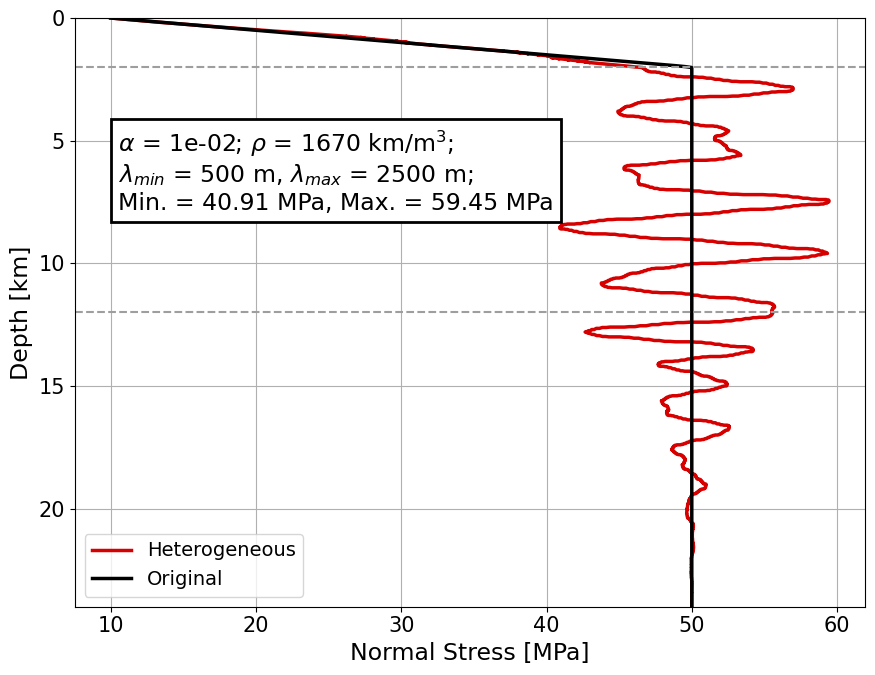

In [6]:
save_on = 0
fractal_model = 6
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/%s'%(prefix.split('/')[0])

based_on_mesh = True
mesh_y = ch.generate_mesh_points(prefix,based_on_mesh,start_y=0,end_y=24,npoints=2000)

# ----- Define constants
H = 0.7                     # Hurst coefficient
L = Hs[0]*1e3               # length of the fault [m]
# L = 24e3
lambdaMin = 500             # minimum wavelength [m]
lambdaMax = 2.5e3           # maximum wavelength [km]
alpha = 1.e-2
rho = 1670                  # kg/m3
g = 9.8                     # m/s2
targetHrms = alpha * L

# ----- Generate rough fault surface
h = ch.GenerateRoughTopography(mesh_y, lambdaMin, lambdaMax, L, H, targetHrms)

# ----- Taper out perturbations in VS zones
for i in range(len(mesh_y)):
    r = -mesh_y[i]
    if r < Hs[-1]:
        h[i] *= r/Hs[-1]
    elif r > Hs[1]:
        h[i] *= ((Hs[0]-r)/(Hs[0]-Hs[1]))**2

# ----- Perturb normal stress profile using the topo
if len(sigma0) > 2:
    sigma = ch.same_length(y,sigma0,mesh_y)
elif len(sigma0) == 2:
    sigma = ch.same_length(sigma0[1],sigma0[0],mesh_y)

het_sigma = sigma + rho*g*h/1e6
print('Min. sigma = %2.2f'%(min(het_sigma[abs(mesh_y)>=Hs[-1]])))
print('Max. sigma = %2.2f'%(max(het_sigma[abs(mesh_y)>=Hs[-1]])))

# ----- Write out heterogeneous normal stress as a function of depth
cc = 0
if save_on:
    wfid = open('%s/fractal_snpre_%02d'%(work_dir,fractal_model),'w')
    for i in np.argsort(mesh_y):
        wfid.write('%4.20f\t%4.20f\n'%(mesh_y[i],het_sigma[i]))
    wfid.close()
# else:
#     for i in np.argsort(mesh_y):
#         if np.mod(cc,250) == 0:
#             print('%4.20f\t%4.20f\n'%(mesh_y[i],het_sigma[i]))
#         cc += 1

# ----- Plot 1. Rough surface topography (h)
# plt.rcParams['font.size'] = '15'
# plt.figure(figsize=(9,7))
# # plt.plot(h,-mesh_y,lw=2.5,color='k')
# plt.scatter(h,-mesh_y,9,color='k')
# plt.xlabel('h [m]',fontsize=17)
# plt.ylabel('Depth [km]',fontsize=17)
# plt.ylim(0,Hs[0])
# plt.gca().invert_yaxis()
# plt.grid(True)
# plt.tight_layout()

# if save_on:
#     plt.savefig('plots/%s/fractal_h_Fourier_%02d.png'%(prefix.split('/')[0],fractal_model))
# plt.show()

# ----- Plot 2. Compare with quasi-homogeneous
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
plt.plot(het_sigma,-mesh_y,lw=2.5,color=mp.myburgundy,label='Heterogeneous')
plt.plot(sigma,-mesh_y,lw=2.5,color='k',label='Original')
if max(abs(sigma)) > 100:
    plt.text(150,1,r'$\alpha$ = %1.0e; $\rho$ = %d km/m$^3$;'%(alpha,rho)+'\n'\
            +r'$\lambda_{min}$ = %d m, $\lambda_{max}$ = %d m; '%(lambdaMin,lambdaMax)+'\n'\
                +r'Mean $\Delta$ %2.2f MPa, Max $\Delta$ = %2.2f MPa'%(np.mean(abs(rho*g*h/1e6)),max(abs(rho*g*h/1e6))),\
                    fontsize=17,va='top',ha='left',bbox=mp.tboxprop)
    plt.xlim(right=400)
else:
    plt.text(10.5,4.5,r'$\alpha$ = %1.0e; $\rho$ = %d km/m$^3$;'%(alpha,rho)+'\n'\
            +r'$\lambda_{min}$ = %d m, $\lambda_{max}$ = %d m; '%(lambdaMin,lambdaMax)+'\n'\
                +'Min. = %2.2f MPa, Max. = %2.2f MPa'%(min(het_sigma[abs(mesh_y)>=Hs[-1]]),max(het_sigma[abs(mesh_y)>=Hs[-1]])),\
                    fontsize=17,va='top',ha='left',bbox=mp.tboxprop)
plt.xlabel('Normal Stress [MPa]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.ylim(0,Hs[0])
xl = plt.gca().get_xlim()
plt.hlines(y=Hs[1],xmax=max(xl)*1.2,xmin=min(xl)*0.8,color='0.62',lw=1.5,linestyles='--')
if len(Hs) > 3:
    plt.hlines(y=Hs[-1],xmax=max(xl)*1.2,xmin=min(xl)*0.8,color='0.62',lw=1.5,linestyles='--')
plt.legend(fontsize=14,loc='lower left')
plt.xlim(xl)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/fractal_stress_Fourier_%02d.png'%(prefix.split('/')[0],fractal_model))

plt.show()

### Depth-dependent normal stress

Fractal normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02
Method 1) Read in actaul mesh points
Total 1680 points
Scaled by target Hrms: 240.0000


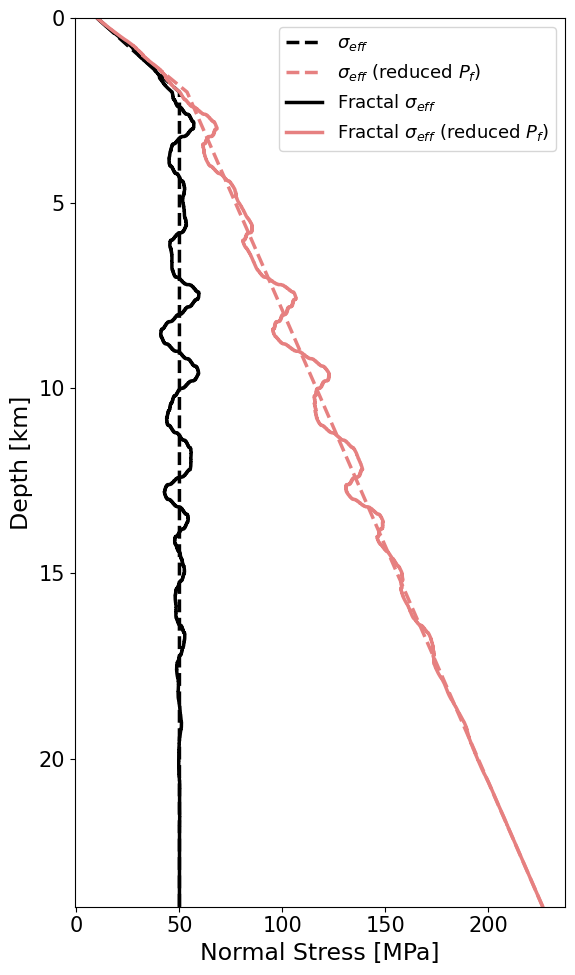

In [22]:
save_on = 1
fractal_model = 6

Hs = ch.load_parameter(prefix)[1]
save_dir = 'depth_dep_sn/reference'
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/supermuc/%s'%(save_dir.split('/')[0])

based_on_mesh = True
frac_y = ch.generate_mesh_points(based_on_mesh,start_y=0,end_y=24,npoints=2000)

# ----- Define constants
H = 0.7                     # Hurst coefficient
L = Hs[0]*1e3               # length of the fault [m]
# L = 24e3
lambdaMin = 500             # minimum wavelength [m]
lambdaMax = 2.5e3           # maximum wavelength [km]
alpha = 1.e-2
rho2 = 1670                  # kg/m3
targetHrms = alpha * L

# ----- Generate rough fault surface
h = ch.GenerateRoughTopography(frac_y, lambdaMin, lambdaMax, L, H, targetHrms)

# ----- Taper out perturbations in VS zones
for i in range(len(frac_y)):
    r = -frac_y[i]
    if r < Hs[-1]:
        h[i] *= r/Hs[-1]
    elif r > Hs[1]:
        h[i] *= ((Hs[0]-r)/(Hs[0]-Hs[1]))**2

# ---------------------------------------
y = -frac_y
rho_c = 2670                  # kg/m3
g = 9.8                     # m/s2
litho_sn = rho_c*g*y*1e-3
rho_w = 1000
hydro_sn = rho_w*g*y*1e-3
gamma = 0.83
rho_f = gamma*rho_c
fault_sn = litho_sn + 10
pp = fault_sn - 50
pp[abs(y)<=2] = fault_sn[abs(y)<=2]-20*y[abs(y)<=2]-10

eff_sn = fault_sn - pp
eff_sn_reduced = fault_sn - pp*0.7

het_sigma = eff_sn + rho2*g*h/1e6
reduced_het_sigma = eff_sn_reduced + rho2*g*h/1e6

# ----- Write out heterogeneous normal stress as a function of depth
cc = 0
if save_on:
    wfid = open('%s/fractal_litho_snpre_%02d'%(work_dir,fractal_model),'w')
    for i in np.argsort(frac_y):
        wfid.write('%4.20f\t%4.20f\n'%(frac_y[i],reduced_het_sigma[i]))
    wfid.close()
else:
    print('Save to %s/fractal_litho_snpre_%02d'%(work_dir,fractal_model))

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(6,10))
plt.plot(eff_sn,y,lw=2.5,c='k',label='$\sigma_{eff}$',linestyle='--')
plt.plot(eff_sn_reduced,y,lw=2.5,c=mp.mypink,label='$\sigma_{eff}$ (reduced $P_f$)',linestyle='--')

# plt.plot(sigma0[0],-sigma0[1],lw=2.5,c='0.62',label='fractal_06')
plt.plot(het_sigma,y,lw=2.5,c='k',label='Fractal $\sigma_{eff}$')
plt.plot(reduced_het_sigma,y,lw=2.5,c=mp.mypink,label='Fractal $\sigma_{eff}$ (reduced $P_f$)')

plt.legend(fontsize=13,loc='upper right')
plt.xlabel('Normal Stress [MPa]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
# plt.xlim(0,650)
plt.ylim(0,24)
ax.invert_yaxis()
plt.tight_layout()
if save_on:
    plt.savefig('plots/%s/fractal_stress_Fourier_%02d.png'%(save_dir.split('/')[0],fractal_model))
plt.show()


### a-b

In [ ]:
save_on = 1
ab_fractal_model = 2
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/%s'%(prefix.split('/')[0])

based_on_mesh = False
mesh_y = ch.generate_mesh_points(based_on_mesh,start_y=0,end_y=24,npoints=2000)

y,Hs,a,b,a_b,tau0,sigma0,Dc,others = sc.base_val()
# ----- Define constants
H = 0.7                     # Hurst coefficient
# L = Hs[0]*1e3               # length of the fault [m]
L = 24e3
lambdaMin = 500             # minimum wavelength [m]
lambdaMax = 2.5e3           # maximum wavelength [km]
alpha = 1e-2
targetHrms = alpha * L
scaler = 0.0025

# ----- Generate rough fault surface
h = ch.GenerateRoughTopography(mesh_y, lambdaMin, lambdaMax, L, H, targetHrms)

# ----- Taper out perturbations in VS zones
for i in range(len(mesh_y)):
    r = -mesh_y[i]
    if r < Hs[-1]:
        h[i] *= (r/Hs[-1])**4
    elif r > Hs[1]:
        h[i] *= ((Hs[0]-r)/(Hs[0]-Hs[1]))**4

# ----- Perturb friction coefficient profile using the topo
if len(a_b) > 2:
    _ab = ch.same_length(y,a_b,mesh_y)
elif len(a_b) == 2:
    _ab = ch.same_length(y_ab,a_b,mesh_y)

het_ab = _ab + h * scaler / np.std(h)
print('Min. sigma = %2.2f'%(min(het_ab)))
print('Max. sigma = %2.2f'%(max(het_ab)))

# # ----- Write out heterogeneous normal stress as a function of depth
if save_on:
    wfid = open('%s/fractal_ab_%02d'%(work_dir,ab_fractal_model),'w')
    for i in np.argsort(mesh_y):
        wfid.write('%4.20f\t%4.40f\n'%(mesh_y[i],het_ab[i]))
    wfid.close()

# ----- Plot 1. Rough surface topography (h)
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
# plt.plot(h,-mesh_y,lw=2.5,color='k')
plt.scatter(h*scaler/np.std(h),-mesh_y,9,color='k')
plt.xlabel('Scaled h [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()

# if save_on:
#     plt.savefig('plots/%s/fractal_h_Fourier_%02d.png'%(prefix.split('/')[0],ab_fractal_model))
plt.show()

# ----- Plot 2. Compare with quasi-homogeneous
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
plt.plot(het_ab,-mesh_y,lw=2.5,color=mp.myburgundy,label='Heterogeneous',zorder=3)
plt.plot(_ab,-mesh_y,lw=2.5,color='k',label='Original',zorder=3)
ixx = np.where(np.logical_and(abs(mesh_y)>2,abs(mesh_y)<12))[0]
plt.text(0.005,4,r'$\alpha$ = %1.0e; scaler = %2.4f'%(alpha,scaler)+'\n'\
         +r'$\lambda_{min}$ = %d m, $\lambda_{max}$ = %d m'%(lambdaMin,lambdaMax)+'\n'\
            +'Min. = %2.4f, Max. = %2.4f'%(min(het_ab[ixx]),max(het_ab[ixx])),\
                fontsize=17,va='top',ha='left',bbox=mp.tboxprop)
plt.xlabel('a - b',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
xl = plt.gca().get_xlim()
plt.xlim(xl[0],0.025)
plt.ylim(0,Hs[0])
plt.hlines(y=Hs[1],xmin=xl[0],xmax=0.025,lw=2.5,linestyles='--',color='0.62')
plt.hlines(y=Hs[-1],xmin=xl[0],xmax=0.025,lw=2.5,linestyles='--',color='0.62')
plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=0.025,lw=2.5,linestyles='--',color='0.62')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(fontsize=14,loc='lower left')
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/fractal_ab_Fourier_%02d.png'%(prefix.split('/')[0],ab_fractal_model))

plt.show()

### Dc

In [ ]:
save_on = 1

Dc_fractal_model = 9
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/%s'%(prefix.split('/')[0])

based_on_mesh = False
mesh_y = ch.generate_mesh_points(based_on_mesh,start_y=0,end_y=24,npoints=2000)

y,Hs,a,b,a_b,tau0,sigma0,Dc,others = sc.base_val()
# ----- Define constants
H = 0.7                     # Hurst coefficient
L = Hs[0]*1e3               # length of the fault [m]
# L = 24e3
lambdaMin = 500             # minimum wavelength [m]
lambdaMax = 2.5e3           # maximum wavelength [m]
# lambdaMin = 1.5e3             # minimum wavelength [m]
# lambdaMax = 2.e3           # maximum wavelength [m]
alpha = 1e-2
targetHrms = alpha * L
# scaler = 5e-4
scaler = 1.5e-4

# ----- Generate rough fault surface
h = ch.GenerateRoughTopography(mesh_y, lambdaMin, lambdaMax, L, H, targetHrms)

# ----- Taper out perturbations in VS zones
for i in range(len(mesh_y)):
    r = -mesh_y[i]
    if r < Hs[-1]:
        h[i] *= (r/Hs[-1])**2
    elif r > Hs[1]:
        h[i] *= ((Hs[0]-r)/(Hs[0]-Hs[1]))**4

# ----- Perturb friction coefficient profile using the topo
# if len(Dc) > 2:
#     _Dc = ch.same_length(y,Dc,mesh_y)
# elif len(Dc) == 2:
#     _Dc = ch.same_length(Dc[1],Dc[0],mesh_y)

_Dc = 0.001*np.ones(mesh_y.shape)

het_dc = _Dc + h * scaler / np.std(h)
print('Min. Dc = %2.2e'%(min(het_dc)))
print('Max. Dc = %2.2e'%(max(het_dc)))

# # ----- Write out heterogeneous normal stress as a function of depth
if save_on:
    wfid = open('%s/fractal_Dc_%02d'%(work_dir,Dc_fractal_model),'w')
    for i in np.argsort(mesh_y):
        wfid.write('%4.20f\t%4.40f\n'%(mesh_y[i],het_dc[i]))
    wfid.close()

# # ----- Plot 1. Rough surface topography (h)
# plt.rcParams['font.size'] = '15'
# plt.figure(figsize=(9,7))
# # plt.plot(h,-mesh_y,lw=2.5,color='k')
# plt.scatter(h*scaler/np.std(h),-mesh_y,9,color='k')
# plt.xlabel('Scaled h [m]',fontsize=17)
# plt.ylabel('Depth [km]',fontsize=17)
# plt.ylim(0,Hs[0])
# plt.gca().invert_yaxis()
# plt.grid(True)
# plt.tight_layout()

# # if save_on:
# #     plt.savefig('plots/%s/fractal_h_Fourier_%02d.png'%(prefix.split('/')[0],Dc_fractal_model))
# plt.show()

# ----- Plot 2. Compare with quasi-homogeneous
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
plt.plot(het_dc,-mesh_y,lw=2.5,color=mp.myburgundy,label='Heterogeneous',zorder=3)
plt.plot(_Dc,-mesh_y,lw=2.5,color='k',label='Original',zorder=3)
ixx = np.where(np.logical_and(abs(mesh_y)>2,abs(mesh_y)<12))[0]
plt.text(_Dc[0]/16,7,r'$\alpha$ = %1.0e; scaler = %2.1e'%(alpha,scaler)+'\n'\
         +r'$\lambda_{min}$ = %d m, $\lambda_{max}$ = %d m'%(lambdaMin,lambdaMax)+'\n'\
            +'Min. = %2.4f, Max. = %2.4f'%(min(het_dc[ixx]),max(het_dc[ixx])),\
                fontsize=17,va='top',ha='left',bbox=mp.tboxprop)
# plt.text(_Dc[0]/25,0.7,r'$\alpha$ = %1.0e; scaler = %2.1e'%(alpha,scaler)+'\n'\
#          +r'$\lambda_{min}$ = %d m, $\lambda_{max}$ = %d m'%(lambdaMin,lambdaMax)+'\n'\
#             +'Min. = %2.4f, Max. = %2.4f'%(min(het_dc[ixx]),max(het_dc[ixx])),\
#                 fontsize=13,va='top',ha='left',bbox=mp.tboxprop)
plt.xlabel('Dc [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
xl = plt.gca().get_xlim()
plt.xlim(0,xl[1])
plt.ylim(0,Hs[0])
plt.hlines(y=Hs[1],xmin=0,xmax=xl[1],lw=2.5,linestyles='--',color='0.62')
plt.hlines(y=Hs[-1],xmin=0,xmax=xl[1],lw=2.5,linestyles='--',color='0.62')
plt.hlines(y=Hs[1]+Hs[2],xmin=0,xmax=xl[1],lw=2.5,linestyles='--',color='0.62')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(fontsize=14,loc='lower left')
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/fractal_Dc_Fourier_%02d.png'%(prefix.split('/')[0],Dc_fractal_model))

plt.show()

### Friction coefficient

In [ ]:
save_on = 0
fc_fractal_model = 1
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/%s'%(prefix.split('/')[0])

# ----- Define constants
H = 0.7                     # Hurst coefficient
L = Hs[0]*1e3               # length of the fault [m]
# L = 24e3
lambdaMin = 500             # minimum wavelength [m]
lambdaMax = 2.5e3           # maximum wavelength [km]
alpha = 1e-2
N = len(mesh_y)
Nmax = int(L / lambdaMin) + 1
if Nmax >= N / 2:
    ValueError(f"Nmax={Nmax}>=N/2({N/2}), increase N")

# ----- Generate rough fault surface
h = GenerateRoughTopography(N, Nmax, lambdaMin, lambdaMax, L, H)
hrms = np.std(h)
targetHrms = alpha * L
# targetHrms = np.sqrt(Ch/(np.pi*2*H)*((L/2/np.pi)**(2*H)))
h = h * targetHrms / hrms
scaler = 0.05

# ----- Taper out perturbations in VS zones
for i in range(len(mesh_y)):
    r = -mesh_y[i]
    if r < Hs[-1]:
        h[i] *= (r/Hs[-1])**2
    elif r > Hs[1]:
        h[i] *= ((Hs[0]-r)/(Hs[0]-Hs[1]))**2

# ----- Perturb friction coefficient profile using the topo
f0 = 0.7*np.ones(mesh_y.shape)

het_f0 = f0 + h * scaler / np.std(h)
print('Min. sigma = %2.2f'%(min(het_f0)))
print('Max. sigma = %2.2f'%(max(het_f0)))

# # ----- Write out heterogeneous normal stress as a function of depth
if save_on:
    wfid = open('%s/fractal_f0_%02d'%(work_dir,fc_fractal_model),'w')
    # for i in reversed(range(len(het_sigma))):
    for i in range(len(het_f0)):
        wfid.write('%4.20f\t%4.20f\n'%(mesh_y[i],het_f0[i]))
    wfid.close()

# # ----- Plot 1. Rough surface topography (h)
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
# plt.plot(h,-mesh_y,lw=2.5,color='k')
plt.scatter(h*scaler/np.std(h),-mesh_y,9,color='k')
plt.xlabel('Scaled h [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/fractal_h_Fourier_%02d.png'%(prefix.split('/')[0],fc_fractal_model))
plt.show()

# ----- Plot 2. Compare with quasi-homogeneous
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
plt.hlines(y=2,xmin=0,xmax=1,lw=2.5,linestyles='--',color='0.62')
plt.hlines(y=12,xmin=0,xmax=1,lw=2.5,linestyles='--',color='0.62')
plt.plot(het_f0,-mesh_y,lw=2.5,color=mp.myburgundy,label='Heterogeneous')
plt.plot(0.6*np.ones(len(mesh_y)),-mesh_y,lw=2.5,color='k',label='Original')
plt.text(0.03,4,r'$\alpha$ = %1.0e; scaler = %2.3f'%(alpha,scaler)+'\n'\
         +r'$\lambda_{min}$ = %d m, $\lambda_{max}$ = %d m'%(lambdaMin,lambdaMax)+'\n'\
            +'Min. = %2.2f, Max. = %2.2f'%(min(het_f0),max(het_f0)),\
                fontsize=17,va='top',ha='left',bbox=mp.tboxprop)
plt.xlabel('Coefficient of Friction',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.xlim(0,1)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(fontsize=14,loc='lower left')
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/fractal_f0_Fourier_%02d.png'%(prefix.split('/')[0],fc_fractal_model))

plt.show()

## Check output points

### Normal stress

In [ ]:
save_on = 0

# ------------------ Input
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/Thakur20_hetero_stress'
fsigma = ch.what_is_varied(prefix)[0]
if fsigma == 0:
    fname = '%s/fractal_snpre'%(work_dir)
else:
    fname = '%s/fractal_snpre_%02d'%(work_dir,fsigma)
het_sigma,mesh_y = ch.read_fractal_file(fname)

# ------------------ Retrieved
print('Load saved data: ./models/%s/outputs'%(prefix))
outputs = np.load('models/%s/outputs.npy'%(prefix))
print('Load saved data: ./models/%s/outputs_depthinfo'%(prefix))
dep = np.load('models/%s/outputs_depthinfo.npy'%(prefix))

z = np.zeros(len(dep))
tau = np.zeros(len(dep))
sigma = np.zeros(len(dep))

c = 0
for i in np.argsort(abs(dep)):
    z[c] = abs(dep[i])
    tau[c] = np.array(outputs[i])[0,3]
    sigma[c] = np.array(outputs[i])[0,5]
    c += 1

# ------------------ Plot
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))

plt.plot(het_sigma,-mesh_y,lw=2.5,color='k',label='Input')
# plt.plot(sigma,z,lw=4,color='w')
plt.scatter(sigma,z,lw=2.5,color='w',s=81,zorder=3)
# plt.plot(sigma,z,lw=2,color=mp.mynavy,zorder=3)
plt.scatter(sigma,z,lw=2.5,color=mp.mynavy,label='Retrieved',zorder=3)
plt.xlabel('Normal Stress [MPa]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(fontsize=14,loc='lower left')
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/io_fractal_stress.png'%(prefix))
plt.show()

### a-b

In [ ]:
save_on = 0

# ------------------ Input
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/Thakur20_various_fractal_profiles'
fab = ch.what_is_varied(prefix)[2]
fname = '%s/fractal_ab_%02d'%(work_dir,fab)
het_ab,mesh_y = ch.read_fractal_file(fname)

# ------------------ Retrieved
print('Load saved data: ./models/%s/outputs'%(prefix))
outputs = np.load('models/%s/outputs.npy'%(prefix))
print('Load saved data: ./models/%s/outputs_depthinfo'%(prefix))
dep = np.load('models/%s/outputs_depthinfo.npy'%(prefix))

z = np.zeros(len(dep))
tau = np.zeros(len(dep))
sigma = np.zeros(len(dep))

c = 0
for i in np.argsort(abs(dep)):
    z[c] = abs(dep[i])
    tau[c] = np.array(outputs[i])[0,3]
    sigma[c] = np.array(outputs[i])[0,5]
    c += 1

# ------------------ Plot
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))

plt.plot(het_ab,-mesh_y,lw=2.5,color='k',label='Input')
# plt.plot(sigma,z,lw=4,color='w')
plt.scatter(sigma,z,lw=2.5,color='w',s=81,zorder=3)
# plt.plot(sigma,z,lw=2,color=mp.mynavy,zorder=3)
plt.scatter(sigma,z,lw=2.5,color=mp.mynavy,label='Retrieved',zorder=3)
plt.xlabel('a - b',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(fontsize=14,loc='lower left')
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/io_fractal_ab.png'%(prefix))
plt.show()

## Compare several models

### Normal stress

In [ ]:
# mode = 'snpre'
# mode = 'ab'
mode = 'Dc'

save_on = 0
work_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/%s'%(prefix.split('/')[0])
# colset = ['k',mp.myburgundy]
# colset = ['k',mp.mypink,mp.myblue]
colset = ['k',mp.mypink,mp.myblue,mp.mygreen]
c=0
tag = ''
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(9,7))
for i in [1,4,5,6]:
    if i == 0:
        fname = '%s/fractal_%s'%(work_dir,mode)
    else:
        fname = '%s/fractal_%s_%02d'%(work_dir,mode,i)

    het_sigma,mesh_y = ch.read_fractal_file(fname)
    plt.plot(het_sigma,-mesh_y,lw=2.5,color=colset[c],label='%s'%(fname.split('/')[-1]))
    c+=1; tag += '_%s'%(i)

if mode == 'sn_pre':
    plt.xlabel('Normal Stress [MPa]',fontsize=17)
elif mode == 'ab':
    plt.xlabel('a - b',fontsize=17)
elif mode == 'dc':
    plt.xlabel('Dc [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(fontsize=14,loc='lower left')
plt.tight_layout()

if save_on:
    plt.savefig('plots/%s/compare_fractal_%s%s.png'%(prefix.split('/')[0],mode,tag))
    print('plots/%s/compare_fractal_%s%s.png'%(prefix.split('/')[0],mode,tag))

plt.show()

In [ ]:
fid.close()

# Damage zone velocity contrast

In [ ]:
rho = 2670 # kg/m3
mu_host = 32e9 # Pa
mu_damg = 10e9
vs_host = np.sqrt(mu_host/rho)
vs_damg = np.sqrt(mu_damg/rho)

print('Host rock Vs: %2.2f m/s'%(vs_host))
print('Damaged rock Vs: %2.2f m/s'%(vs_damg))
print('Damaged rock relative to the host rock: %2.2f %%'%(vs_damg/vs_host*100))

# a/b vs. Ru

Fractal depth-dependent normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_litho_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02
Heterogeneous normal stress profile
Heterogeneous a-b profile
Heterogeneous Dc profile
Lengths: 1680 2000 2000 -> base: 1
base = a-b
L = 12.198 km
Mu = 20GPa, Dc = 0.0012 - 0.0024 m
Ru = 0.040 - 779.263
a/b = 0.359 - 1.000


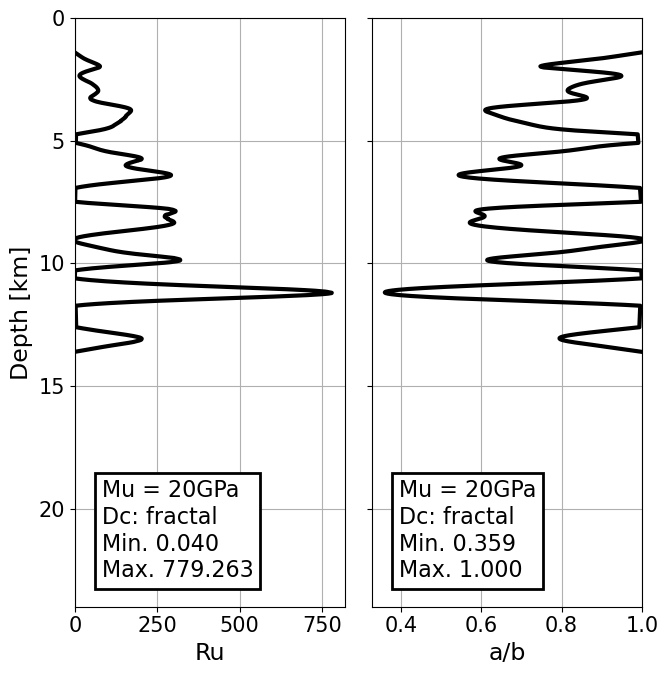

In [2]:
save_on = 0
# --------- Interpolate variables to match the lengths: b, sigma & a-b
mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix)

# Shear modulus (within DZ for DZ model)
mu = 20e9

# --------- Mask out only VW zone
# VW = np.where(np.logical_and(-mesh_y >= Hs[-1], -mesh_y<= Hs[1]))[0]
VW = np.where(_ab<0)[0]
L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
print('L = %2.3f km'%(L/1e3))
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]

# --------- Compute a/b and Ru number
# D_c = 0.0008*np.ones(len(D_c))
if not 'DZ' in prefix:
    if max(D_c)-min(D_c) > 1e-4:
        print('Mu = %dGPa, Dc = %1.4f - %1.4f m'%(mu/1e9,min(D_c),max(D_c)))
    else:
        print('Mu = %dGPa, Dc = %2.3f m'%(mu/1e9,min(Dc)))
LnRR = mu*D_c/(sigma_n*(bb-aa))
Ru = L/LnRR
# if 'DZ' in prefix:
#     print('Damage zone model')
#     G = 32          # domain shear modulus in GPa
#     Gcz = mu/1e9    # DZ shear modulus in GPa
#     T = 0.5         # DZ width in km
#     W = L/1e3       # seismogenic zone width in km
#     print('G = %d GPa, Gcz = %d GPa, T = %2.2f km, W = %2.2f km'%(G,Gcz,T,W))
#     incoth = np.pi*Ru*T/W + np.arctanh(Gcz/G)
#     Geff = Gcz / np.tanh(incoth)
#     Ru = W*(bb-aa)*sigma_n/L/Geff

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(ncols=2,figsize=(7,7))

ax[0].plot(Ru,-mesh_y,color='k',lw=3,label='a/b',zorder=3)
print('Ru = %2.3f - %2.3f'%(min(Ru),max(Ru)))
ax[0].set_xlabel('Ru',fontsize=17)
ax[0].set_ylabel('Depth [km]',fontsize=17)
xl = ax[0].get_xlim()
ax[0].set_xlim(0,xl[1])
# ax[0].set_xlim(0,500)
ax[0].set_ylim(0,24)
ax[0].invert_yaxis()
ax[0].grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax[0].text(xl[1]*0.1,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(Ru),max(Ru)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[0].text(xl[1]*0.1,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(Ru),max(Ru)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

ax[1].plot(aa/bb,-mesh_y,color='k',lw=3,label='Ru',zorder=3)
print('a/b = %2.3f - %2.3f'%(min(aa/bb),max(aa/bb)))
ax[1].set_xlabel('a/b',fontsize=17)
# ax[1].set_ylabel('Depth [km]',fontsize=17)
ax[1].axes.yaxis.set_ticklabels([])
xl = ax[1].get_xlim()
ax[1].set_xlim(xl[0],1.)
ax[1].set_ylim(0,24)
ax[1].invert_yaxis()
ax[1].grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax[1].text(xl[0]+(1-xl[0])*0.1,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(aa/bb),max(aa/bb)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[1].text(xl[0]+(1-xl[0])*0.1,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(aa/bb),max(aa/bb)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

plt.tight_layout()

if save_on:
    if max(D_c)-min(D_c) > 1e-4:
        # if 'DZ' in prefix:
        #     plt.savefig('plots/%s/abRu_%d_NnB22.png'%(prefix,mu/1e9))
        # else:
        #     plt.savefig('plots/%s/abRu_%d.png'%(prefix,mu/1e9))
        plt.savefig('plots/%s/abRu_%d.png'%(prefix,mu/1e9))
    else:
        # if 'DZ' in prefix:
        #     plt.savefig('plots/%s/abRu_%d_%d_NnB22.png'%(prefix,mu/1e9,min(D_c)*1e4))
        # else:
        #     plt.savefig('plots/%s/abRu_%d_%d.png'%(prefix,mu/1e9,min(D_c)*1e4))
        plt.savefig('plots/%s/abRu_%d_%d.png'%(prefix,mu/1e9,min(D_c)*1e4))

plt.show()

In [3]:
np.median(Ru),np.mean(Ru)

(110.9123453660367, 109.95215581658364)

In [17]:
# 1e-9 m/s
1e-9*sc.yr2sec*1e3

31.536

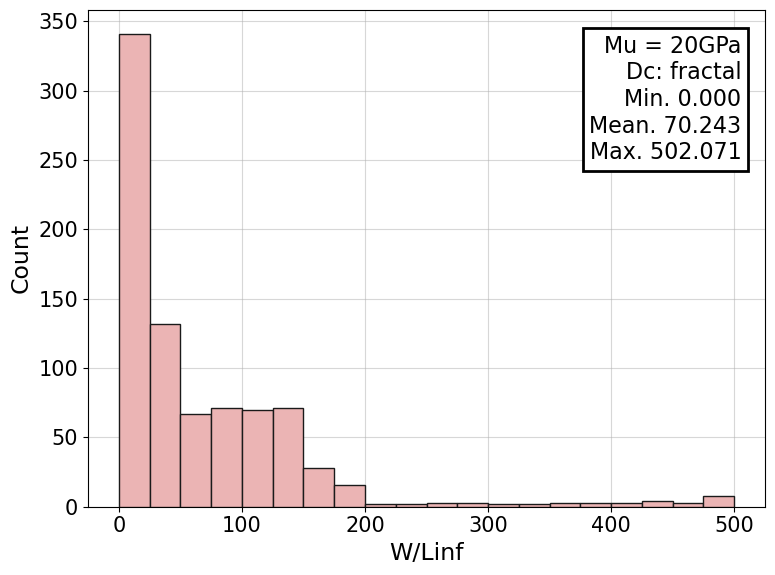

In [44]:
from matplotlib.ticker import MultipleLocator
save_on = 1
plt.figure(figsize=(8,6))
plt.hist(W/Linf,color=mp.mypalepink,edgecolor='0.1',bins=np.arange(0,max(W/Linf),25),zorder=3)
plt.xlabel('W/Linf',fontsize=17)
plt.ylabel('Count',fontsize=17)
xl = plt.gca().get_xlim()
yl = plt.gca().get_ylim()
if max(D_c)-min(D_c) > 1e-4:
    plt.text(xl[1]-(xl[1]-xl[0])*0.035,yl[1]-(yl[1]-yl[0])*0.05,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMean. %2.3f\nMax. %2.3f'%(mu/1e9,min(W/Linf),np.mean(W/Linf),max(W/Linf)),fontsize=16,va='top',ha='right',bbox=mp.tboxprop)
else:
    plt.text(xl[1]-(xl[1]-xl[0])*0.05,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMean. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(W/Linf),np.mean(W/Linf),max(W/Linf)),fontsize=16,va='top',ha='right',bbox=mp.tboxprop)
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.grid(True,alpha=0.5,which='both')
plt.tight_layout()
if save_on:
    if max(D_c)-min(D_c) > 1e-4:
        plt.savefig('plots/%s/hist_WLinf_%d.png'%(prefix,mu/1e9))
    else:
        plt.savefig('plots/%s/hist_WLinf_%d_%d.png'%(prefix,mu/1e9,min(D_c)*1e4))
plt.show()

In [34]:
print(Linf[np.argmax(Linf)]/Linf[np.argmax(Linf)+10])
print(aa[np.argmax(Linf)])
print(aa[np.argmax(Linf)+10])
# print(Linf[np.argmax(Linf)],sigma_n[np.argmax(Linf)],D_c[np.argmax(Linf)],(bb-aa)[np.argmax(Linf)]**2)
# print(Linf[np.argmax(Linf)+10],sigma_n[np.argmax(Linf)+10],D_c[np.argmax(Linf)+10],(bb-aa)[np.argmax(Linf)+10]**2)
# print(1e9/44700288.82241413,1e9/48434778.095547155)
print((1e9/45e6/(1.8750522395960965e-12))/(1e9/48e6/(4.991519084028671e-06)))
# Linf = bb*mu*D_c/(np.pi*sigma_n*(bb-aa)**2)          # Rubin and Ampuero (2005)

3179458.944279559
0.018998630674531166
0.016765829217801675
2839540.632804351


## Historgram of Ru

In [ ]:
from matplotlib.ticker import MultipleLocator
save_on = 0
plt.figure(figsize=(8,6))
plt.hist(Ru,color=mp.mypalepink,edgecolor='0.1',bins=np.arange(0,1050,50),zorder=3)
plt.xlabel('Ru',fontsize=17)
plt.ylabel('Count',fontsize=17)
xl = plt.gca().get_xlim()
yl = plt.gca().get_ylim()
if max(D_c)-min(D_c) > 1e-4:
    plt.text(xl[1]-(xl[1]-xl[0])*0.035,yl[1]-(yl[1]-yl[0])*0.05,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(aa/bb),max(aa/bb)),fontsize=16,va='top',ha='right',bbox=mp.tboxprop)
else:
    plt.text(xl[1]-(xl[1]-xl[0])*0.05,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(aa/bb),max(aa/bb)),fontsize=16,va='top',ha='right',bbox=mp.tboxprop)
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.grid(True,alpha=0.5,which='both')
plt.tight_layout()
if save_on:
    if max(D_c)-min(D_c) > 1e-4:
        plt.savefig('plots/%s/hist_abRu_%d.png'%(prefix,mu/1e9))
    else:
        plt.savefig('plots/%s/hist_abRu_%d_%d.png'%(prefix,mu/1e9,min(D_c)*1e4))
plt.show()

## Compare historgrams

In [ ]:
from matplotlib.ticker import MultipleLocator

save_on = 1
mus = [20,15,10]
collist = [mp.myblue,mp.mypink,mp.myyellow]

# --------- Interpolate variables to match the lengths: b, sigma & a-b
mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix)

# --------- Mask out VW zone
VW = np.where(_ab<0)[0]
L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
print('L = %2.3f km'%(L/1e3))
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]

def gen_hist(mu,col,lab):
    # --------- Compute a/b and Ru number
    if not 'DZ' in prefix:
        if max(D_c)-min(D_c) > 1e-4:
            print('Mu = %dGPa, Dc = %1.4f - %1.4f m'%(mu/1e9,min(D_c),max(D_c)))
        else:
            print('Mu = %dGPa, Dc = %2.3f m'%(mu/1e9,min(Dc)))
    LnRR = mu*D_c/(sigma_n*(bb-aa))
    Ru = L/LnRR
    plt.hist(Ru,color=col,bins=np.arange(0,1050,50),zorder=3,alpha=0.3,label=lab)
    plt.hist(Ru,edgecolor=col,bins=np.arange(0,1050,50),zorder=3,histtype='step',lw=2)
    return Ru

mulist = ''
plt.figure(figsize=(8,6))
for i,mu in enumerate(mus):
    Ru = gen_hist(mu*1e9,collist[i],'$\mu=%d$ GPa'%(mu))
    plt.text(750,100-10*i,'Mean: %2.2f'%(np.mean(Ru[Ru>0])),color=collist[i],fontweight='bold')
    mulist += '_%d'%(mu)
plt.xlabel('Ru',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.legend(fontsize=15,loc='upper right')
xl = plt.gca().get_xlim()
yl = plt.gca().get_ylim()
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.grid(True,alpha=0.5,which='both')
plt.tight_layout()
if save_on:
    if max(D_c)-min(D_c) > 1e-4:
        plt.savefig('plots/%s/compare_hist_abRu%s.png'%(prefix,mulist))
    else:
        plt.savefig('plots/%s/compare_hist_abRu_%d%s.png'%(prefix,min(D_c)*1e4,mulist))
plt.show()

In [ ]:
# Old ver.
save_on = 0
# --------- Interpolate variables to match the lengths: b, sigma & a-b
l1,l2,l3=0,0,0
if len(sigma0) == 2:
    print('Heterogeneous normal stress profile')
    l1 = len(sigma0[1])
if len(a_b) == 2:
    print('Heterogeneous a-b profile')
    l2 = len(a_b[1])
if len(Dc) == 2:
    print('Heterogeneous Dc profile')
    l3 = len(Dc[1])
if sum([l1,l2,l3]) > 0:
    base = np.argmax([l1,l2,l3])
    print('Lengths:',l1,l2,l3,'-> base:',base)
    meshs = [sigma0[1],a_b[1],Dc[1]]
    mesh_y = meshs[base]
else:
    print('Do not need to rebase')
    mesh_y = y

if l1 > 0 and 0 == base:
    print('base = sigma0')
    _sigma = sigma0[0]
elif l1 > 0:
    _sigma = ch.same_length(sigma0[1],sigma0[0],mesh_y)
else:
    _sigma = ch.same_length(y,sigma0,mesh_y)

if l2 > 0 and 1 == base:
    print('base = a-b')
    _ab = a_b[0]
    _a = a
    _b = b
elif l2 > 0:
    _ab = ch.same_length(a_b[1],a_b[0],mesh_y)
    _a = ch.same_length(a_b[1],a,mesh_y)
    _b = ch.same_length(a_b[1],b,mesh_y)
else:
    _ab = ch.same_length(y,a_b,mesh_y)
    _a = ch.same_length(y,a,mesh_y)
    _b = ch.same_length(y,b,mesh_y)

if l3 > 0 and 2 == base:
    print('base = Dc')
    _Dc = Dc[0]
elif l3 > 0:
    _Dc = ch.same_length(Dc[1],Dc[0],mesh_y)
else:
    _Dc = ch.same_length(y,Dc,mesh_y)

# Shear modulus (within DZ for DZ model)
mu = 10e9

# --------- Mask out only VW zone
VW = np.where(_ab<0)[0]
L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
print('L = %2.3f km'%(L/1e3))
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]

# --------- Compute a/b and Ru number
# D_c = 0.0008*np.ones(len(D_c))
if not 'DZ' in prefix:
    if max(D_c)-min(D_c) > 1e-4:
        print('Mu = %dGPa, Dc = %1.4f - %1.4f m'%(mu/1e9,min(D_c),max(D_c)))
    else:
        print('Mu = %dGPa, Dc = %2.3f m'%(mu/1e9,min(Dc)))
LnRR = mu*D_c/(sigma_n*(bb-aa))
Ru = L/LnRR
if 'DZ' in prefix:
    print('Damage zone model')
    G = 32          # domain shear modulus in GPa
    Gcz = mu/1e9    # DZ shear modulus in GPa
    T = 0.5         # DZ width in km
    W = L/1e3       # seismogenic zone width in km
    print('G = %d GPa, Gcz = %d GPa, T = %2.2f km, W = %2.2f km'%(G,Gcz,T,W))
    incoth = np.pi*Ru*T/W + np.arctanh(Gcz/G)
    Geff = Gcz / np.tanh(incoth)
    Ru = W*(bb-aa)*sigma_n/L/Geff

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(ncols=2,figsize=(7,7))

ax[0].plot(Ru,-mesh_y,color='k',lw=3,label='a/b',zorder=3)
print('Ru = %2.3f - %2.3f'%(min(Ru),max(Ru)))
ax[0].set_xlabel('Ru',fontsize=17)
ax[0].set_ylabel('Depth [km]',fontsize=17)
xl = ax[0].get_xlim()
ax[0].set_xlim(0,xl[1])
# ax[0].set_xlim(0,500)
ax[0].set_ylim(0,24)
ax[0].invert_yaxis()
ax[0].grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax[0].text(xl[1]*0.1,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(Ru),max(Ru)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[0].text(xl[1]*0.1,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(Ru),max(Ru)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

ax[1].plot(aa/bb,-mesh_y,color='k',lw=3,label='Ru',zorder=3)
print('a/b = %2.3f - %2.3f'%(min(aa/bb),max(aa/bb)))
ax[1].set_xlabel('a/b',fontsize=17)
# ax[1].set_ylabel('Depth [km]',fontsize=17)
ax[1].axes.yaxis.set_ticklabels([])
xl = ax[1].get_xlim()
ax[1].set_xlim(xl[0],1.)
ax[1].set_ylim(0,24)
ax[1].invert_yaxis()
ax[1].grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax[1].text(xl[0]+(1-xl[0])*0.1,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(aa/bb),max(aa/bb)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[1].text(xl[0]+(1-xl[0])*0.1,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(aa/bb),max(aa/bb)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

plt.tight_layout()

if save_on:
    if max(D_c)-min(D_c) > 1e-4:
        if 'DZ' in prefix:
            plt.savefig('plots/%s/abRu_%d_NnB22.png'%(prefix,mu/1e9))
        else:
            plt.savefig('plots/%s/abRu_%d.png'%(prefix,mu/1e9))
    else:
        if 'DZ' in prefix:
            plt.savefig('plots/%s/abRu_%d_%d_NnB22.png'%(prefix,mu/1e9,min(D_c)*1e4))
        else:
            plt.savefig('plots/%s/abRu_%d_%d.png'%(prefix,mu/1e9,min(D_c)*1e4))

plt.show()

## Strictly VW only

In [ ]:
save_on = 0
# --------- Interpolate variables to match the lengths: b, sigma & a-b
l1,l2,l3=0,0,0
if len(sigma0) == 2:
    print('Heterogeneous normal stress profile')
    l1 = len(sigma0[1])
if len(a_b) == 2:
    print('Heterogeneous a-b profile')
    l2 = len(a_b[1])
if len(Dc) == 2:
    print('Heterogeneous Dc profile')
    l3 = len(Dc[1])
if sum([l1,l2,l3]) > 0:
    base = np.argmax([l1,l2,l3])
    print('Lengths:',l1,l2,l3,'-> base:',base)
    meshs = [sigma0[1],a_b[1],Dc[1]]
    mesh_y = meshs[base]
else:
    print('Do not need to rebase')
    mesh_y = y

if l1 > 0 and 0 == base:
    print('base = sigma0')
    _sigma = sigma0[0]
elif l1 > 0:
    _sigma = ch.same_length(sigma0[1],sigma0[0],mesh_y)
else:
    _sigma = ch.same_length(y,sigma0,mesh_y)

if l2 > 0 and 1 == base:
    print('base = a-b')
    _ab = a_b[0]
    _a = a
    _b = b
elif l2 > 0:
    _ab = ch.same_length(a_b[1],a_b[0],mesh_y)
    _a = ch.same_length(a_b[1],a,mesh_y)
    _b = ch.same_length(a_b[1],b,mesh_y)
else:
    _ab = ch.same_length(y,a_b,mesh_y)
    _a = ch.same_length(y,a,mesh_y)
    _b = ch.same_length(y,b,mesh_y)

if l3 > 0 and 2 == base:
    print('base = Dc')
    _Dc = Dc[0]
elif l3 > 0:
    _Dc = ch.same_length(Dc[1],Dc[0],mesh_y)
else:
    _Dc = ch.same_length(y,Dc,mesh_y)

# --------- Mash out only VW zone
# VW = np.where(_ab<0)[0]
# L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
VW = np.where(np.logical_and(abs(mesh_y)<Hs[1],abs(mesh_y)>Hs[3]))[0]
L = (Hs[1]-Hs[3])*1e3
print('L = %2.3f km'%(L/1e3))
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]

# --------- Compute a/b and Ru number
mu = 20e9
# D_c = 0.0008*np.ones(len(D_c))
if max(D_c)-min(D_c) > 1e-4:
    print('Mu = %dGPa, Dc = %1.4f - %1.4f m'%(mu/1e9,min(D_c),max(D_c)))
else:
    print('Mu = %dGPa, Dc = %2.3f m'%(mu/1e9,min(Dc)))
LnRR = mu*D_c/(sigma_n*(bb-aa))
Ru = L/LnRR

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(ncols=2,figsize=(7,7))

ax[0].plot(abs(Ru),-mesh_y,color='k',lw=3,label='a/b',zorder=3)
print('Ru = %2.3f - %2.3f'%(min(Ru),max(Ru)))
ax[0].set_xlabel('Ru',fontsize=17)
ax[0].set_ylabel('Depth [km]',fontsize=17)
xl = ax[0].get_xlim()
ax[0].set_xlim(0,xl[1])
ax[0].set_ylim(0,24)
ax[0].invert_yaxis()
ax[0].grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax[0].text(xl[1]*0.1,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMean. %2.3f\nMax. %2.3f'%(mu/1e9,min(Ru),np.mean(Ru),max(Ru)),
               fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[0].text(xl[1]*0.1,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMean. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(Ru),np.mean(Ru),max(Ru)),
               fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

ax[1].plot(aa/bb,-mesh_y,color='k',lw=3,label='Ru',zorder=3)
print('a/b = %2.3f - %2.3f'%(min(aa/bb),max(aa/bb)))
ax[1].set_xlabel('a/b',fontsize=17)
# ax[1].set_ylabel('Depth [km]',fontsize=17)
ax[1].axes.yaxis.set_ticklabels([])
xl = ax[1].get_xlim()
ax[1].set_xlim(xl[0],1.)
ax[1].set_ylim(0,24)
ax[1].invert_yaxis()
ax[1].grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax[1].text(xl[0]+(1-xl[0])*0.1,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(aa/bb),max(aa/bb)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[1].text(xl[0]+(1-xl[0])*0.1,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(aa/bb),max(aa/bb)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

plt.tight_layout()

if save_on:
    if max(D_c)-min(D_c) > 1e-4:
        plt.savefig('plots/%s/abRu_%d_onlyVW.png'%(prefix,mu/1e9))
    else:
        plt.savefig('plots/%s/abRu_%d_%d_onlyVW.png'%(prefix,mu/1e9,min(D_c)*1e4))

plt.show()

# W/Linf

Fractal Dc model ver.2
Using file fractal_Dc_02
Heterogeneous Dc profile
Lengths: 0 0 2000 -> base: 2
base = Dc
L = 11.550 km
Mu = 10GPa, Dc = 0.0012 - 0.0027 m
89.63403696064786 78150715.9244971
128.8547886392134 0.00014778847193929972
W/Linf = 0.000 - 128.855
Mean W/Linf = 71.125; Median W/Linf = 73.297


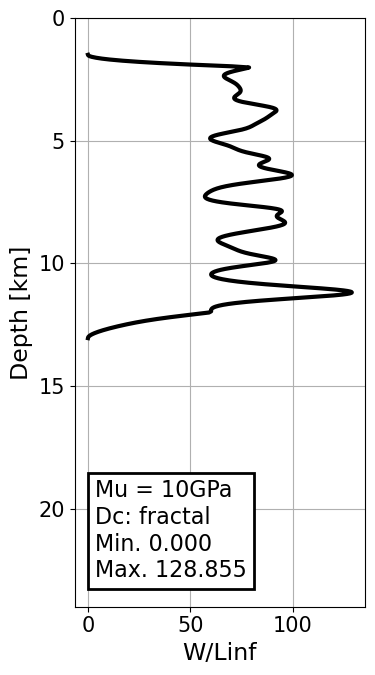

In [11]:
save_on = 0
# --------- Interpolate variables to match the lengths: b, sigma & a-b
mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix)

# Shear modulus (within DZ for DZ model)
mu = 10e9

# --------- Mask out only VW zone
# VW = np.where(np.logical_and(-mesh_y >= Hs[-1], -mesh_y<= Hs[1]))[0]
VW = np.where(_ab<0)[0]
L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
print('L = %2.3f km'%(L/1e3))
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]

# --------- Compute a/b and Ru number
# D_c = 0.0008*np.ones(len(D_c))
if not 'DZ' in prefix:
    if max(D_c)-min(D_c) > 1e-4:
        print('Mu = %dGPa, Dc = %1.4f - %1.4f m'%(mu/1e9,min(D_c),max(D_c)))
    else:
        print('Mu = %dGPa, Dc = %2.3f m'%(mu/1e9,min(Dc)))

# W = 10e3
W = L
Linf = bb*mu*D_c/(np.pi*sigma_n*(bb-aa)**2)          # Rubin and Ampuero (2005)

print(min(Linf),max(Linf))
# print(0.45*np.sqrt(W/min(Linf)),0.45*np.sqrt(W/max(Linf)))
print(W/min(Linf),W/max(Linf))

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(4,7))

ax.plot(W/Linf,-mesh_y,color='k',lw=3,label='Ru',zorder=3)
print('W/Linf = %2.3f - %2.3f'%(min(W/Linf),max(W/Linf)))
print('Mean W/Linf = %2.3f; Median W/Linf = %2.3f'%(np.mean(W/Linf),np.quantile(W/Linf,0.5)))
ax.set_xlabel('W/Linf',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
xl = ax.get_xlim()
# ax[1].set_xlim(xl[0],1.)
ax.set_ylim(0,24)
ax.invert_yaxis()
ax.grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax.text(xl[0]+(xl[1]-xl[0])*0.07,23,'Mu = %dGPa\nDc: fractal\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(W/Linf),max(W/Linf)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax[1].text(xl[0]+(xl[1]-xl[0])*0.07,23,'Mu = %dGPa\nDc = %2.4f m\nMin. %2.3f\nMax. %2.3f'%(mu/1e9,min(D_c),min(W/Linf),max(W/Linf)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

plt.tight_layout()

plt.show()

# Mesh resolution

In [5]:
state_evolution_law = 'aging'
# state_evolution_law = 'slip'

# --------- Interpolate variables to match the lengths: b, sigma & a-b
mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix) 

# ------------------ Input
mu = 20e9               # Shear modulus [Pa]
# _Dc = 2e-3*np.ones(len(_Dc))
C = 1                   # Constant of order 1
muprime = mu            # For anti-plane

# idx = np.where(np.logical_and(-mesh_y >= Hs[-1], -mesh_y<= Hs[1]))[0]
idx = np.where(_ab<0)[0]
_a_b = _ab[idx]
b0 = _b[idx]
D_c = _Dc[idx]
sigma_n = _sigma[idx]*1e6                             # Effective normal stress [Pa]

# ------------------ Input
if state_evolution_law == 'aging':
    lambda0 = C*muprime*D_c/(b0*sigma_n)                        # Process zone / cohesive zone
    hstar = 2*muprime*b0*D_c/(np.pi*sigma_n*(_a_b**2))          # Nucleation size for 0.5 < a/b < 1, aging law; Chen & Lapusta (2009)
    Linf = b0*muprime*D_c/(np.pi*sigma_n*_a_b**2)               # Rubin and Ampuero (2005)
    Lb = muprime*D_c/(sigma_n*b0)                               # Dieterich (1992)

# ------- Tandem build related info.
polyd = 6
numcell = 6

if max(b0)-min(b0) > 1e-3 and max(D_c)-min(D_c) > 1e-4:
    print('C =',C,', mu =',mu/1e9,'GPa, b =',min(b0),'-',max(b0),'Dc = %1.4f - %1.4f m'%(min(D_c),max(D_c)))
elif max(b0)-min(b0) > 1e-3:
    print('C =',C,', mu =',mu/1e9,'GPa, b =',min(b0),'-',max(b0),'Dc =',min(D_c))
elif max(D_c)-min(D_c) > 1e-4:
    print('C =',C,', mu =',mu/1e9,'GPa, b =',min(b0),'Dc = %1.4f - %1.4f m'%(min(D_c),max(D_c)))
else:
    print('C =',C,', mu =',mu/1e9,'GPa, b =',min(b0),'Dc =',min(D_c))
print('Min. process zone size: %2.2f m'%(min(lambda0)))
print('Min. nucleation size (L_inf): %2.2f m'%(min(hstar)))
print('Min. nucleation size (L_b): %2.2f m'%(min(Lb)))
print('Max. element size to sample critical length by %d cells: %2.2f m'%(int(numcell),polyd*min(min(lambda0),min(hstar),min(Lb))/numcell))

Fractal depth-dependent normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_litho_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02
Heterogeneous normal stress profile
Heterogeneous a-b profile
Heterogeneous Dc profile
Lengths: 1680 2000 2000 -> base: 1
base = a-b
C = 1 , mu = 20.0 GPa, b = 0.019 Dc = 0.0012 - 0.0024 m
Min. process zone size: 10.00 m
Min. nucleation size (L_inf): 15.57 m
Min. nucleation size (L_b): 10.00 m
Max. element size to sample critical length by 6 cells: 10.00 m


In [3]:
min(lambda0)

10.001631921616266

# MPI rank vs. load time

In [ ]:
save_on = 1

# mpirank = np.array([1,2,4,8,16,32,64])
mpirank = np.array([0,1,2,3,4,5,6])
loadtime_m = [32.37,16.87,13.12,10.55,9.66,8.94,300]
loadtime_ca = [33.31,21.58,12.30,10.59,8.59,9.60,300]
loadtime_rt = [15.30,10.95,7.79,7.01,5.74,300,300]

wd = 0.2
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,8))
plt.bar(mpirank-wd*1.5,loadtime_m,width=wd, color=mp.myblue,edgecolor='k',align='edge',label='Master')
plt.bar(mpirank-wd/2,loadtime_ca,width=wd, color=mp.mypalepink,edgecolor='k',align='edge',label='Casper\'s (manual)')
plt.bar(mpirank+wd*0.5,loadtime_rt,width=wd, color=mp.mygreen,edgecolor='k',align='edge',label='Casper\'s (region tag)')
plt.ylim(0,40)
# plt.xscale('log', base=2)
plt.xticks(ticks=mpirank,labels=['1','2','4','8','16','32','64'])
plt.xlabel('MPI Rank',fontsize=17)
plt.ylabel('Time [s]',fontsize=17)
plt.title('Mesh with 14,912 elements',fontsize=20,fontweight='bold')
plt.legend(fontsize=13,loc='upper left')
plt.tight_layout()
if save_on:
    plt.savefig('plots/MPIrank_vs_time.png')
plt.show()

# Various critical lengths

In [ ]:
# --------- Interpolate variables to match the lengths
f_ab = interpolate.interp1d(y,a_b,bounds_error=False,fill_value=a_b[0])
f_a = interpolate.interp1d(y,a,bounds_error=False,fill_value=a[0])
f_b = interpolate.interp1d(y,b,bounds_error=False,fill_value=b[0])

_ab = f_ab(mesh_y)
_b = f_b(mesh_y)

# ------------------ Input
mu = 10e9               # Shear modulus [Pa]
Dc = 0.004              # Characteristic distance [m]
C = 1                   # Constant of order 1
muprime = mu            # For anti-plane

idx = np.where(np.logical_and(-mesh_y >= Hs[-1], -mesh_y<= Hs[1]))[0]
_a_b = _ab[idx]
b0 = _b[idx]
sigma_n = sigma0[idx]*1e6                                    # Effective normal stress [Pa]

# ------------------ Input
lambda0 = C*mu*Dc/b0/sigma_n                          # Process zone / cohesive zone
hstar = np.pi*mu*b0*Dc/(2*sigma_n*(_a_b**2))          # Nucleation size for 0.5 < a/b < 1, aging law; Chen & Lapusta (2009)
Linf = b0*muprime*Dc/(np.pi*sigma_n*(_a_b**2))        # Rubin and Ampuero (2005)

print('Process zone size      : %2.2f m - %2.2f m'%(min(lambda0),max(lambda0)))
print('Nucleation size (hstar; CnL09): %2.2f m - %2.2f m'%(min(hstar),max(hstar)))
print('Nucleation size (Linf; RnA09): %2.2f m - %2.2f m'%(min(Linf),max(Linf)))
print('Minimum critical lengths: %2.2f m'%(min(min(lambda0),min(hstar),min(Linf))))


# Estimate compuational resource

In [2]:
def mem_per_task(nnodes,tasks_per_node,ram=90):
    if tasks_per_node > 48:
        raise KeyError('Task should not exceed max. number of cores (48)')
    mem_per_task = ram*nnodes/tasks_per_node
    print('%d nodes, %d tasks per node (total %d tasks) -> %1.1f GB per task'%(nnodes,tasks_per_node,nnodes*tasks_per_node,mem_per_task))
    # return mem_per_task

mem_per_task(17,6)
mem_per_task(25,4)

17 nodes, 6 tasks per node (total 102 tasks) -> 255.0 GB per task
25 nodes, 4 tasks per node (total 100 tasks) -> 562.5 GB per task
